CODE BLOCK: 1

In [1]:
# Import all the required modules
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

if 'google.colab' in sys.modules:
    # Download the repo from GitHub
    print("Downloading repository on Colab...")
    !git clone https://github.com/Shilpaj1994/ERA.git
    
    # Import files from the downloaded repository
    sys.path.insert(0,'./ERA/Session6/')

Cloning into 'ERA'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 57 (delta 16), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (57/57), 382.58 KiB | 9.11 MiB/s, done.


CODE BLOCK: 2

In [2]:
# Check if GPU is available
# Set device as GPU if available else CPU
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA Available? True


CODE BLOCK: 3

In [3]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1325,), (0.3104,))
    ])

CODE BLOCK: 4

In [4]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 415055668.36it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42355137.70it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 136268351.92it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20957677.41it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



CODE BLOCK: 5

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

CODE BLOCK: 6

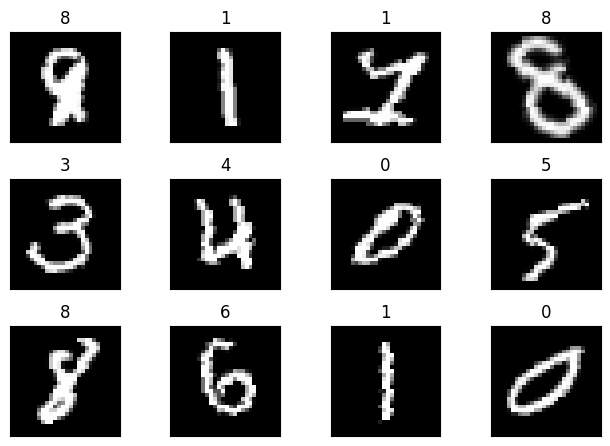

In [6]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [7]:
from model import Network

In [8]:
# Model Summary
from utils import get_summary

get_summary(Network(), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
           Dropout-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,304
           Dropout-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 16, 22, 22]           2,304
           Dropout-8           [-1, 16, 22, 22]               0
       BatchNorm2d-9           [-1, 16, 22, 22]              32
           Conv2d-10           [-1, 16, 20, 20]           2,304
          Dropout-11           [-1, 16, 20, 20]               0
      BatchNorm2d-12           [-1, 16, 20, 20]              32
           Conv2d-13           [-1, 12, 20, 20]             192
        MaxPool2d-14           [-1, 12,

CODE BLOCK: 8

In [9]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [10]:
from utils import train, test

CODE BLOCK: 10

In [11]:
# Put the model on selected device
model = Network().to(device)

# Optimization algorithm to update the weights
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Scheduler to change the learning rate after specific number of epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

# New Line
criterion = F.nll_loss

# Number of epochs for which model is to be trained
num_epochs = 20

# For each epoch
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')

    # Train the model on training dataset and append the training loss and accuracy
    correct, processed, train_loss = train(model, device, train_loader, optimizer, criterion)
    train_acc.append(100 * correct / processed)
    train_losses.append(train_loss / len(train_loader))

    # Test the model's performance on test dataset and append the training loss and accuracy
    correct, test_loss = test(model, device, test_loader, criterion)
    test_acc.append(100. * correct / len(test_loader.dataset))
    test_losses.append(test_loss)
    
    # Update the learning rate after specified number of epochs
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.7722 Batch_id=117 Accuracy=86.54: 100%|██████████| 118/118 [00:20<00:00,  5.81it/s]


Test set: Average loss: 4.1834, Accuracy: 9778/10000 (97.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.5059 Batch_id=117 Accuracy=96.78: 100%|██████████| 118/118 [00:20<00:00,  5.73it/s]


Test set: Average loss: 4.0864, Accuracy: 9824/10000 (98.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.4901 Batch_id=117 Accuracy=97.58: 100%|██████████| 118/118 [00:23<00:00,  4.95it/s]


Test set: Average loss: 4.0349, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=2.4351 Batch_id=117 Accuracy=97.98: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]


Test set: Average loss: 4.0235, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=2.4054 Batch_id=117 Accuracy=98.11: 100%|██████████| 118/118 [00:21<00:00,  5.41it/s]


Test set: Average loss: 3.9988, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=2.4809 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:21<00:00,  5.50it/s]


Test set: Average loss: 3.9874, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=2.4592 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 3.9821, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=2.4055 Batch_id=117 Accuracy=98.53: 100%|██████████| 118/118 [00:20<00:00,  5.67it/s]


Test set: Average loss: 3.9772, Accuracy: 9913/10000 (99.13%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=2.4429 Batch_id=117 Accuracy=98.64: 100%|██████████| 118/118 [00:21<00:00,  5.39it/s]


Test set: Average loss: 3.9731, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=2.3473 Batch_id=117 Accuracy=98.68: 100%|██████████| 118/118 [00:20<00:00,  5.69it/s]


Test set: Average loss: 3.9704, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=2.3743 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [00:20<00:00,  5.63it/s]


Test set: Average loss: 3.9701, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=2.4101 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [00:22<00:00,  5.25it/s]


Test set: Average loss: 3.9668, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=2.3918 Batch_id=117 Accuracy=98.87: 100%|██████████| 118/118 [00:22<00:00,  5.34it/s]


Test set: Average loss: 3.9618, Accuracy: 9947/10000 (99.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=2.4132 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:22<00:00,  5.33it/s]


Test set: Average loss: 3.9628, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=2.3984 Batch_id=117 Accuracy=98.98: 100%|██████████| 118/118 [00:23<00:00,  5.10it/s]


Test set: Average loss: 3.9608, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=2.4322 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 3.9554, Accuracy: 9957/10000 (99.57%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=2.3629 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:22<00:00,  5.20it/s]


Test set: Average loss: 3.9580, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=2.4198 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:23<00:00,  5.04it/s]


Test set: Average loss: 3.9566, Accuracy: 9954/10000 (99.54%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=2.3798 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]


Test set: Average loss: 3.9571, Accuracy: 9955/10000 (99.55%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=2.3935 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 3.9562, Accuracy: 9957/10000 (99.57%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

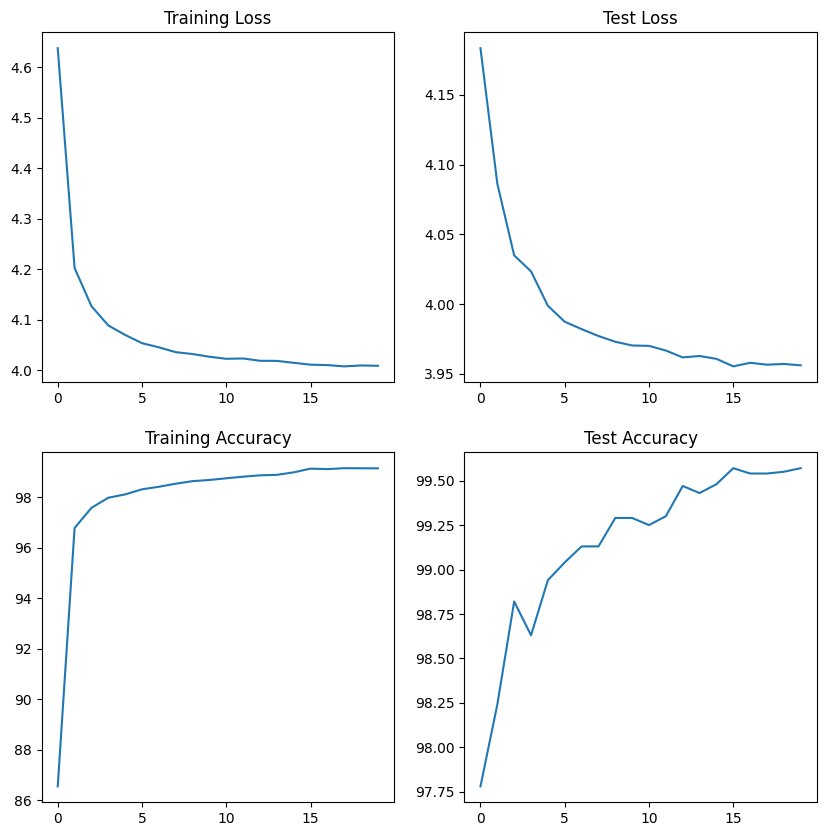

In [12]:
# Print loss and accuracy
from utils import display_loss_and_accuracies
display_loss_and_accuracies(train_losses, train_acc, test_losses, test_acc)